In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display

df=pd.read_csv('~/code/fablaw/circor/raw_data/1.0.3/new_table.csv')
df

,Unnamed: 0,Patient_id,select,Outcome
0,0,9979,TV,Abnormal
1,1,13918,TV,Abnormal
2,2,14241,PV,Abnormal
3,3,29045,TV,Abnormal
4,4,33151,TV,Abnormal
...,...,...,...,...
549,549,85334,AV,Normal
550,550,85337,AV,Normal
551,551,85338,MV,Normal
552,552,85340,MV,Normal


In [2]:
df.loc[115, 'select']='AV'


In [3]:
df.loc[131, 'select']='PV'

In [4]:
df.loc[309, 'select']='TV'

KeyboardInterrupt: 

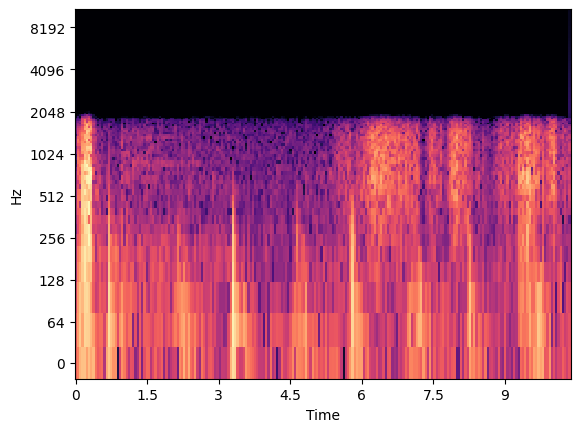

In [5]:
for i in df.index:
    file='../raw_data/1.0.3/audio_raw/'+str(df.loc[i, 'Patient_id'])+'_'+df.loc[i,'select']+'.wav'
    x, sr=librosa.load(file)
    
    D = librosa.stft(x[0:50000], n_fft=446, hop_length=224)
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    spectrogram = librosa.display.specshow(S_db, y_axis="log", sr=sr, hop_length=1024, x_axis="time")
    
    rgbas= spectrogram.to_rgba(spectrogram.get_array().reshape(S_db.shape))
    
    rgba=rgbas[:,:,0:3]
    
    output='/Users/fabianlaw/code/fablaw/circor/raw_data/1.0.3/proc_img/'+str(df.loc[i, 'Patient_id'])+'_'+df.loc[i,'select']+'.npy'
    np.save(output, rgba)


In [ ]:
#filepath='~/code/fablaw/circor/raw_data/1.0.3/new_table_2.csv'
#df.to_csv(filepath)

In [17]:
x, sr=librosa.load('../raw_data/1.0.3/audio_treated/9979_TV.wav')
x

array([0.00897987, 0.01129296, 0.0136486 , ..., 0.13081965, 0.08147584,
       0.        ], dtype=float32)

In [18]:
len(x)

112775

In [19]:
x[0:10000]

array([ 0.00897987,  0.01129296,  0.0136486 , ..., -0.01113698,
       -0.01506587, -0.01894396], dtype=float32)

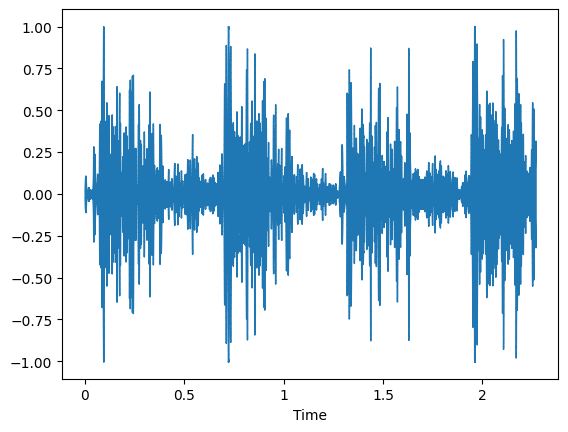

In [20]:
librosa.display.waveshow(x[0:50000], sr=sr)

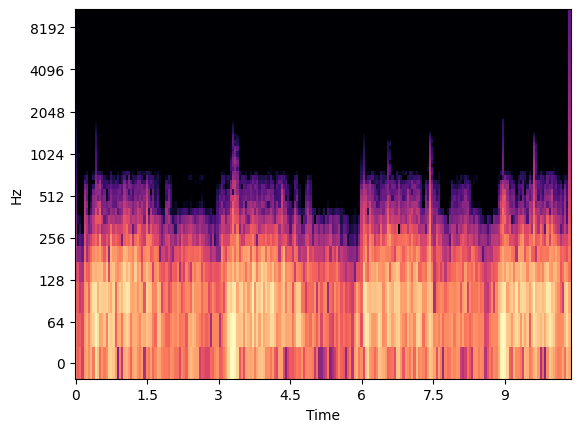

In [33]:
D = librosa.stft(x[0:50000], n_fft=446, hop_length=224)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
spec=librosa.display.specshow(S_db, y_axis="log", sr=sr, hop_length=1024, x_axis="time")

In [22]:
spec.get_array()

masked_array(data=[-21.138828, -27.936476, -24.274775, ..., -80.      ,
                   -80.      , -56.65023 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [23]:
S_db.shape

(224, 224)

In [24]:
s=spec.to_rgba(spec.get_array().reshape(S_db.shape))

In [25]:
s.shape

(224, 224, 4)

In [26]:
s_1=s[:,:,0:3]

In [27]:
s_1.shape

(224, 224, 3)